In [48]:
import pandas as pd
import numpy as np

In [49]:
data = pd.read_csv("chiller_cop_forecasting_6h.csv")
data

,time,MB_HIGHGENR,COP,PCH,Ttzas,PC,Ttpow,id,COP_6H_AHEAD
0,1,114.504592,1.251762,1022.223161,5.879592,309.444420,8.589796,0,1.293444
1,2,114.904189,1.261016,991.252399,5.901667,344.149555,8.361667,0,1.284470
2,3,113.085395,1.264211,978.205917,5.841667,325.526156,8.565833,0,1.170920
3,4,114.665556,1.243009,924.308292,5.907083,348.257578,8.492222,0,1.241507
4,5,114.078373,1.214547,862.944146,5.897500,349.746165,8.251945,0,1.259130
...,...,...,...,...,...,...,...,...,...
26582,26583,119.300463,1.157746,836.621111,5.344583,794.220936,9.648333,0,1.238901
26583,26584,117.425370,1.149881,815.603123,5.427500,693.172280,9.176667,0,1.235545
26584,26585,113.820303,1.155544,832.509966,5.385000,649.719766,8.970000,0,1.241793
26585,26586,112.279697,1.346890,836.130988,5.359167,615.031116,8.797222,0,1.217477


In [50]:
# check if there is any null
data.isnull().values.any()
data.dropna(inplace=True)

In [51]:
data.drop(columns="time", inplace=True)
data.drop(columns="id", inplace=True)
data.describe()

,MB_HIGHGENR,COP,PCH,Ttzas,PC,Ttpow,COP_6H_AHEAD
count,26587.000000,26587.000000,26587.000000,26587.000000,26587.000000,26587.000000,26587.000000
mean,113.238522,1.225757,805.467526,6.061767,525.306197,9.579265,1.225755
std,11.092035,0.087753,232.652959,1.602628,308.039099,2.252370,0.087753
min,80.269545,0.508177,0.146179,1.691667,5.924167,5.390714,0.508177
25%,107.667286,1.192416,668.567749,5.587083,339.923064,8.810976,1.192416
50%,114.216944,1.243535,801.918719,5.891667,599.341786,9.289500,1.243527
75%,119.885891,1.275735,963.759659,5.997500,743.665592,9.649741,1.275735
max,138.740197,1.582803,1588.698816,19.899890,1485.983179,22.900000,1.582803


In [59]:
from sklearn import preprocessing


x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)

data

,0,1,2,3,4,5,6
0,0.585508,0.691948,0.643401,0.230002,0.205073,0.182708,0.730735
1,0.592342,0.700559,0.623905,0.231214,0.228522,0.169679,0.722384
2,0.561236,0.703532,0.615692,0.227919,0.215939,0.181339,0.616719
3,0.588261,0.683803,0.581764,0.231512,0.231297,0.177135,0.682405
4,0.578219,0.657317,0.543135,0.230985,0.232303,0.163412,0.698804
...,...,...,...,...,...,...,...
26582,0.667530,0.604461,0.526564,0.200619,0.532612,0.243163,0.679980
26583,0.635461,0.597142,0.513333,0.205173,0.464338,0.216225,0.676856
26584,0.573805,0.602411,0.523976,0.202839,0.434980,0.204422,0.682671
26585,0.547457,0.780470,0.526256,0.201420,0.411542,0.194554,0.660043


In [60]:
from collections import deque
import random

LOOKBACK_SIZE = 20

seq_data = []
prev_data = deque(maxlen=LOOKBACK_SIZE)

for row in data.values:
    prev_data.append([columns for columns in row[:-1]])
    if len(prev_data) == LOOKBACK_SIZE:
        seq_data.append([np.array(prev_data), row[-1]])


random.shuffle(seq_data)
       
seq_data[0]

[array([[0.42196956, 0.68894452, 0.65121975, 0.20290741, 0.41209531,
         0.14588179],
        [0.42320307, 0.68753232, 0.64796461, 0.2033905 , 0.43361121,
         0.14583419],
        [0.42812562, 0.60070542, 0.61610477, 0.20390258, 0.43485559,
         0.15567251],
        [0.44742988, 0.80700023, 0.57699807, 0.20150694, 0.46252162,
         0.17921103],
        [0.49203999, 0.74639636, 0.6019504 , 0.19935132, 0.45443819,
         0.19120694],
        [0.51782215, 0.65401383, 0.6076624 , 0.20640857, 0.41377618,
         0.20813448],
        [0.56150741, 0.74461277, 0.60190156, 0.20745206, 0.40991471,
         0.2167997 ],
        [0.58019913, 0.6547826 , 0.5806735 , 0.19985018, 0.41443606,
         0.22225079],
        [0.58969819, 0.63289516, 0.66141041, 0.2056763 , 0.41900684,
         0.22395464],
        [0.58996898, 0.82402184, 0.65740777, 0.19954354, 0.39888119,
         0.2286442 ],
        [0.6030482 , 0.74756391, 0.65195291, 0.2058136 , 0.41277394,
         0.22206358],

In [61]:

X = []
y = []

for seq, target in seq_data:
    X.append(seq.ravel())  # seq.flatten() should work as well
    y.append(target)

train_x = np.array(X)
train_y = np.array(y)

In [62]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(train_x, train_y, test_size=0.33)

In [56]:
X.shape

(17800, 120)

Epoch 1/50
445/445 [==============================] - 2s 2ms/step - loss: 0.0286 - accuracy: 1.3644e-05 - val_loss: 0.0032 - val_accuracy: 2.8090e-04
Epoch 2/50
445/445 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 5.3802e-06 - val_loss: 0.0031 - val_accuracy: 2.8090e-04
Epoch 3/50
445/445 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 1.5970e-05 - val_loss: 0.0028 - val_accuracy: 2.8090e-04
Epoch 4/50
445/445 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 3.8567e-05 - val_loss: 0.0028 - val_accuracy: 2.8090e-04
Epoch 5/50
445/445 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 1.2180e-04 - val_loss: 0.0027 - val_accuracy: 2.8090e-04
Epoch 6/50
445/445 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 6.6637e-05 - val_loss: 0.0028 - val_accuracy: 2.8090e-04
Epoch 7/50
445/445 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 9.9124e

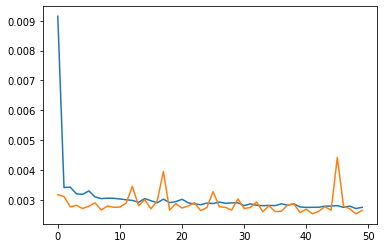

In [63]:
import tensorflow as tf
import tensorflow.keras as keras

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(80, input_dim=X.shape[1], activation="tanh"))
model.add(Dense(25, activation="tanh"))
model.add(Dense(1, activation="relu"))

model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

history = model.fit(X, y, epochs=50, validation_split = 0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

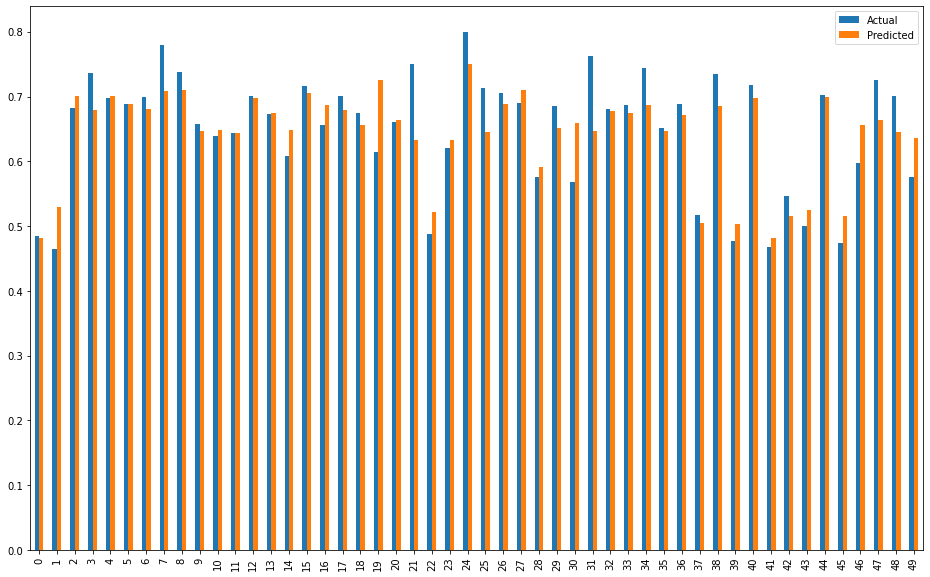

In [64]:
y_pred = model.predict(X_test)
res_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
res_compare = res_compare.head(50)

res_compare.plot(kind="bar", figsize=(16,10))
plt.show()